Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2948 - loss: 1.9093 - val_accuracy: 0.4951 - val_loss: 1.3917
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4490 - loss: 1.5278 - val_accuracy: 0.5465 - val_loss: 1.2761
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4946 - loss: 1.4115 - val_accuracy: 0.5784 - val_loss: 1.1944
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5188 - loss: 1.3540 - val_accuracy: 0.5847 - val_loss: 1.1813
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5419 - loss: 1.2952 - val_accuracy: 0.6223 - val_loss: 1.0720
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5492 - loss: 1.2705 - val_accuracy: 0.6249 - val_loss: 1.0607
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5585 - loss: 1.2404 - val_accuracy: 0.6322 - val_loss: 1.0717
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5704 - loss: 1.2237 - val_accuracy: 0

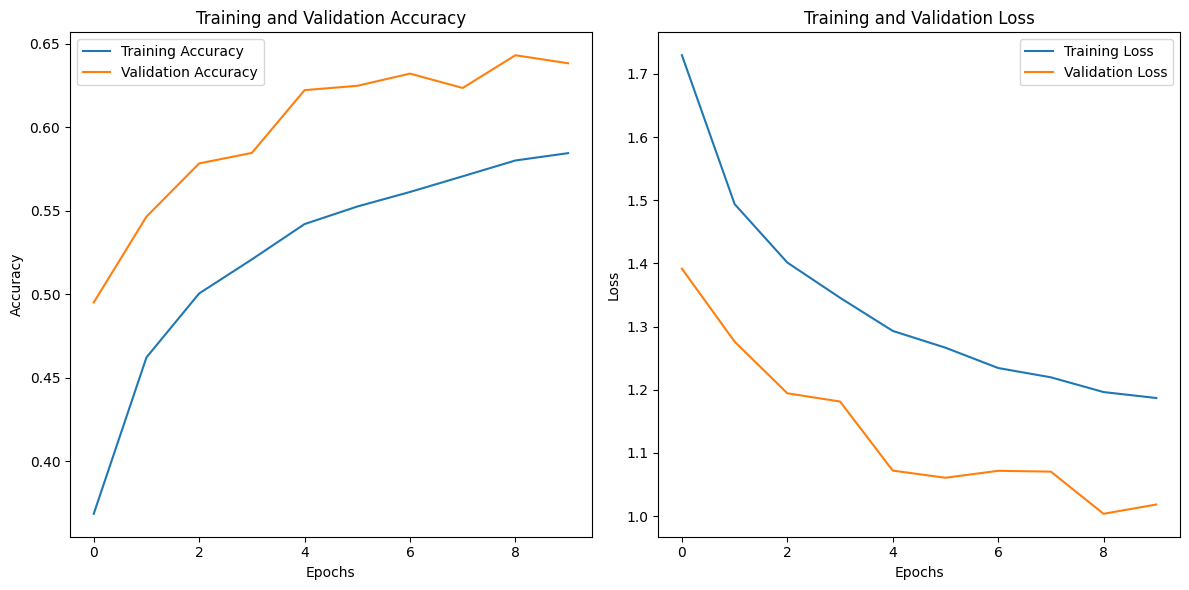

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Data loading and preprocessing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Explicit Input layer
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Capture the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

